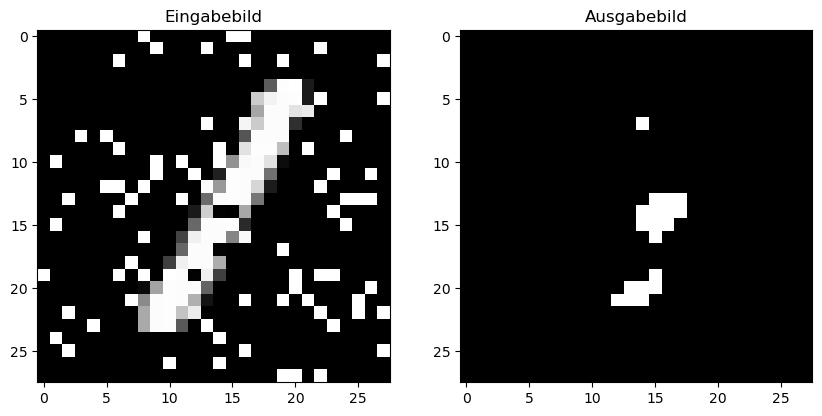

In [11]:
import numpy as np

class HopfieldNetwork:
    def __init__(self, dimensions):
        self.dimensions = dimensions
        self.weights = np.zeros((dimensions, dimensions))

    def train(self, patterns):
        for pattern in patterns:
            pattern = pattern.flatten()
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)

    def recall(self, pattern, iterations=5):
        pattern = pattern.flatten()
        for _ in range(iterations):
            for i in range(self.dimensions):
                raw_output = np.dot(self.weights[i], pattern)
                if raw_output > 0:
                    pattern[i] = 1
                elif raw_output < 0:
                    pattern[i] = -1
        return pattern.reshape((int(np.sqrt(self.dimensions)), int(np.sqrt(self.dimensions))))


from tensorflow.keras.datasets import mnist

# Lade den MNIST-Datensatz herunter
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisiere die Daten auf -1 bis 1
x_train = x_train / 127.5 - 1
x_test = x_test / 127.5 - 1

# Verflache die Bilder
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))


# Erstelle ein Hopfield-Netzwerk
network = HopfieldNetwork(28*28)

# Wählen Sie eine Untergruppe der Trainingsdaten für jede Ziffer
x_train_digits = [x_train[y_train == i][:50] for i in range(10)]

# Kombinieren Sie diese in eine einzige Liste von Mustern
x_train_combined = np.concatenate(x_train_digits)

# Trainieren Sie das Netzwerk mit diesen Mustern
network.train(x_train_combined)



# Wähle ein zufälliges Bild aus dem Testset
input_image = np.copy(x_test[np.random.choice(len(x_test))])

# Füge Rauschen hinzu, indem du zufällig einige Pixel umdrehst
# Hierbei wird nur mit einer Wahrscheinlichkeit von 10% ein Pixel umgedreht
noise_indices = np.random.choice([True, False], size=input_image.shape, p=[0.1, 0.9])
input_image[noise_indices] = -input_image[noise_indices]


# Versuche, das ursprüngliche Bild zurückzurufen
output_image = network.recall(input_image)


import matplotlib.pyplot as plt

# Forme die Bilder in ihre ursprüngliche Form von 28x28 um
input_image = input_image.reshape((28, 28))
output_image = output_image.reshape((28, 28))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Eingabebild')
plt.imshow(input_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Ausgabebild')
plt.imshow(output_image, cmap='gray')

plt.show()

In [2]:
print("done")

done


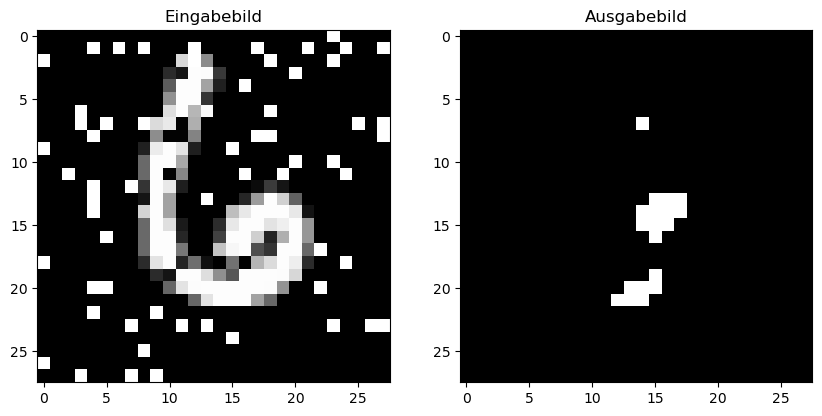

In [18]:
import numpy as np

class HopfieldNetwork:
    def __init__(self, dimensions):
        self.dimensions = dimensions
        self.weights = np.zeros((dimensions, dimensions))

    def train(self, patterns):
        for pattern in patterns:
            pattern = pattern.flatten()
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)

    def recall(self, pattern, iterations=100):  # Erhöhen Sie die Anzahl der Iterationen auf 10
        pattern = pattern.flatten()
        for _ in range(iterations):
            for i in np.random.permutation(self.dimensions):  # Verwenden Sie asynchrones Update
                raw_output = np.dot(self.weights[i], pattern)
                if raw_output > 0:
                    pattern[i] = 1
                elif raw_output < 0:
                    pattern[i] = -1
        return pattern.reshape((int(np.sqrt(self.dimensions)), int(np.sqrt(self.dimensions))))


from tensorflow.keras.datasets import mnist

# Lade den MNIST-Datensatz herunter
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisiere die Daten auf -1 bis 1
x_train = x_train / 127.5 - 1
x_test = x_test / 127.5 - 1

# Verflache die Bilder
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))


# Erstelle ein Hopfield-Netzwerk
network = HopfieldNetwork(28*28)

# Wählen Sie eine Untergruppe der Trainingsdaten für jede Ziffer
x_train_digits = [x_train[y_train == i][:50] for i in range(10)]

# Kombinieren Sie diese in eine einzige Liste von Mustern
x_train_combined = np.concatenate(x_train_digits)

# Trainieren Sie das Netzwerk mit diesen Mustern
network.train(x_train_combined)


# Wähle ein zufälliges Bild aus dem Testset
input_image = np.copy(x_test[np.random.choice(len(x_test))])

# Füge Rauschen hinzu, indem du zufällig einige Pixel umdrehst
# Hierbei wird nur mit einer Wahrscheinlichkeit von 10% ein Pixel umgedreht
noise_indices = np.random.choice([True, False], size=input_image.shape, p=[0.1, 0.9])
input_image[noise_indices] = -input_image[noise_indices]


# Versuche, das ursprüngliche Bild zurückzurufen
output_image = network.recall(input_image)


import matplotlib.pyplot as plt

# Forme die Bilder in ihre ursprüngliche Form von 28x28 um
input_image = input_image.reshape((28, 28))
output_image = output_image.reshape((28, 28))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Eingabebild')
plt.imshow(input_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Ausgabebild')
plt.imshow(output_image, cmap='gray')

plt.show()


In [ ]:
print("done")

In [32]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

class HopfieldNetwork:
    def __init__(self, dimensions):
        self.dimensions = dimensions
        self.weights = np.zeros((dimensions, dimensions))

    def train(self, patterns):
        for pattern in patterns:
            pattern = pattern.flatten()
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)

    def recall(self, pattern, iterations=20):
        pattern = pattern.flatten()
        for _ in range(iterations):
            for i in range(self.dimensions):
                raw_output = np.dot(self.weights[i], pattern)
                if raw_output > 0:
                    pattern[i] = 1
                elif raw_output < 0:
                    pattern[i] = -1
        return pattern.reshape((int(np.sqrt(self.dimensions)), int(np.sqrt(self.dimensions))))

# Lade den MNIST-Datensatz herunter
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [33]:
# Normalisiere die Daten auf -1 bis 1
x_train = x_train / 127.5 - 1
x_test = x_test / 127.5 - 1

# Verflache die Bilder
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Erstelle ein Netzwerk für jede Ziffer
networks = [HopfieldNetwork(28*28) for _ in range(10)]

# Trainiere jedes Netzwerk mit der entsprechenden Ziffer
for i in range(10):
    networks[i].train(x_train[y_train == i])

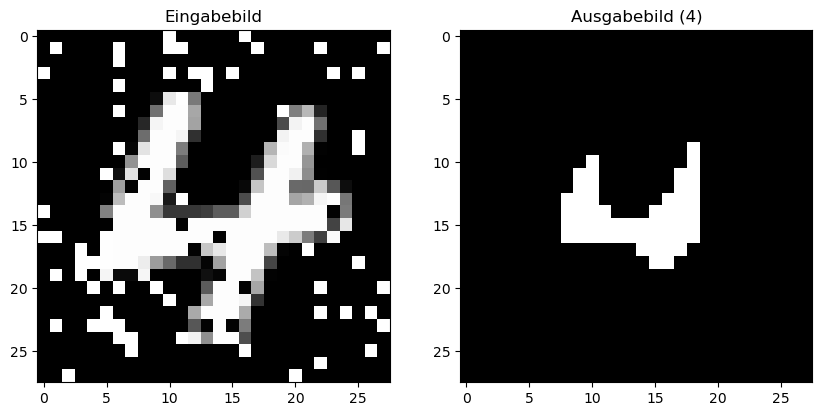

In [34]:
# Wähle ein zufälliges Bild aus dem Testset
input_image = np.copy(x_test[np.random.choice(len(x_test))])

# Füge Rauschen hinzu, indem du zufällig einige Pixel umdrehst
noise_indices = np.random.choice([True, False], size=input_image.shape, p=[0.1, 0.9])
input_image[noise_indices] = -input_image[noise_indices]

# Versuche, das ursprüngliche Bild zurückzurufen mit jedem Netzwerk
output_images = [network.recall(input_image) for network in networks]

# Wähle das Ausgabebild, das am besten mit dem Eingabebild übereinstimmt
best_match = np.argmax([np.dot(input_image.flatten(), img.flatten()) for img in output_images])

# Forme das Eingabebild und das beste Ausgabebild in ihre ursprüngliche Form von 28x28 um
input_image = input_image.reshape((28, 28))
best_output_image = output_images[best_match].reshape((28, 28))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Eingabebild')
plt.imshow(input_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Ausgabebild ({best_match})')
plt.imshow(best_output_image, cmap='gray')

plt.show()


In [27]:
print("Done")

Done


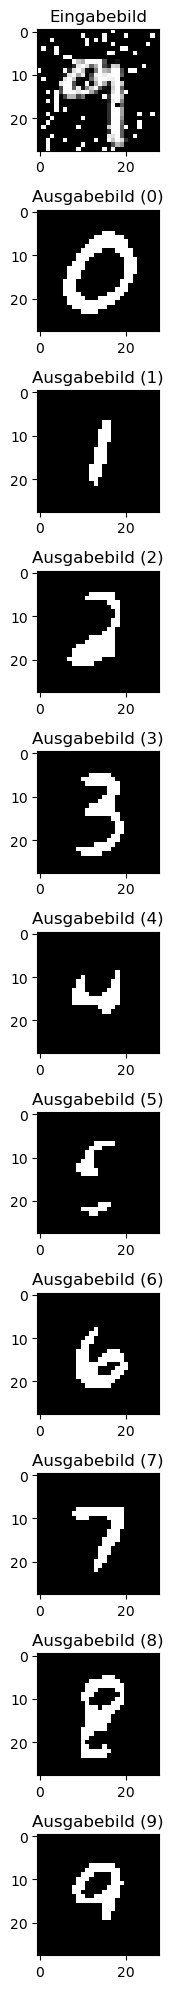

In [30]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

class HopfieldNetwork:
    def __init__(self, dimensions):
        self.dimensions = dimensions
        self.weights = np.zeros((dimensions, dimensions))

    def train(self, patterns):
        for pattern in patterns:
            pattern = pattern.flatten()
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)

    def recall(self, pattern, iterations=5):
        pattern = pattern.flatten()
        for _ in range(iterations):
            for i in range(self.dimensions):
                raw_output = np.dot(self.weights[i], pattern)
                if raw_output > 0:
                    pattern[i] = 1
                elif raw_output < 0:
                    pattern[i] = -1
        return pattern.reshape((int(np.sqrt(self.dimensions)), int(np.sqrt(self.dimensions))))

# Lade den MNIST-Datensatz herunter
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisiere die Daten auf -1 bis 1
x_train = x_train / 127.5 - 1
x_test = x_test / 127.5 - 1

# Verflache die Bilder
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

#-------

# Wähle die ersten 50 Bilder jeder Ziffer
x_train_digits = [x_train[y_train == i][:500] for i in range(10)]

# Kombiniere diese in eine einzige Liste von Mustern
x_train_combined = np.concatenate(x_train_digits)

# Erstelle ein Hopfield-Netzwerk
network = HopfieldNetwork(28*28)

# Trainiere das Netzwerk mit diesen Mustern
network.train(x_train_combined)
#----------

# Wähle ein zufälliges Bild aus dem Testset
input_image = np.copy(x_test[np.random.choice(len(x_test))])

# Füge Rauschen hinzu, indem du zufällig einige Pixel umdrehst
noise_indices = np.random.choice([True, False], size=input_image.shape, p=[0.1, 0.9])
input_image[noise_indices] = -input_image[noise_indices]

# Versuche, das ursprüngliche Bild zurückzurufen mit jedem Netzwerk
output_images = [network.recall(input_image) for network in networks]

# Forme das Eingabebild und das beste Ausgabebild in ihre ursprüngliche Form von 28x28 um
input_image = input_image.reshape((28, 28))
output_images = [img.reshape((28, 28)) for img in output_images]

plt.figure(figsize=(20, 20))

plt.subplot(11, 1, 1)
plt.title('Eingabebild')
plt.imshow(input_image, cmap='gray')

for i, img in enumerate(output_images):
    plt.subplot(11, 1, i + 2)
    plt.title(f'Ausgabebild ({i})')
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()
